# Q1- To get the top 'n' words from the list of files. (Type-1)

In [54]:
# Some necessary code
from collections import defaultdict, Counter
import pandas as pd
import re, datetime
from functools import partial
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

def tokenize(message):
    message = message.lower()                       # convert to lowercase
    all_words = re.findall("[a-z0-9']+", message)   # extract the words
    return (all_words) 

In [55]:
# Here, we are inserting code to create a map_reduce function that runs MapReduce on input using functions mapper and reducer
def map_reduce(inputs, mapper, reducer, n):
    collector = defaultdict(list)

    
    # Inserting a code to write a for loop over the inputs that calls mapper
    for i in inputs:
        for key, value in mapper(i):
            collector[key].append(value)

            
    # Inserting a code to write a return statement that calls the reducer
    return [output
           for key, values in collector.items()
           for output in reducer(key,values,n)]  

# Inserting a code to create a mapper function that return (file, value) for all files
def words_all_files_mapper(file_name):
    
    #Inserting a code to read all the files & then tokenize it.
    with open (file_name, "r") as f:
        for line in f:
            for word in tokenize(line):
                yield('All_files',(word,1))

                
# Inserting a code to create a reducer function that return the word with the highest total count    
def most_pop_top_n_word_reducer(file, words_and_counts, n):
    word_counts = Counter()
    
    
    # Inserting a code to write a for loop that will count all the words.
    for word, count in words_and_counts:
        word_counts[word] += count
    
        
    # Inserting code to find most common word and return that (key, value) pair   
    yield (file, word_counts.most_common(n))
    


 Top 12 words in all the files are : 
╒═════════╤══════════╕
│ Words   │   Counts │
╞═════════╪══════════╡
│ and     │     7478 │
├─────────┼──────────┤
│ the     │     6041 │
├─────────┼──────────┤
│ of      │     3330 │
├─────────┼──────────┤
│ he      │     1769 │
├─────────┼──────────┤
│ to      │     1634 │
├─────────┼──────────┤
│ in      │     1419 │
├─────────┼──────────┤
│ that    │     1360 │
├─────────┼──────────┤
│ unto    │     1278 │
├─────────┼──────────┤
│ his     │     1206 │
├─────────┼──────────┤
│ him     │     1181 │
├─────────┼──────────┤
│ said    │      979 │
├─────────┼──────────┤
│ i       │      916 │
╘═════════╧══════════╛


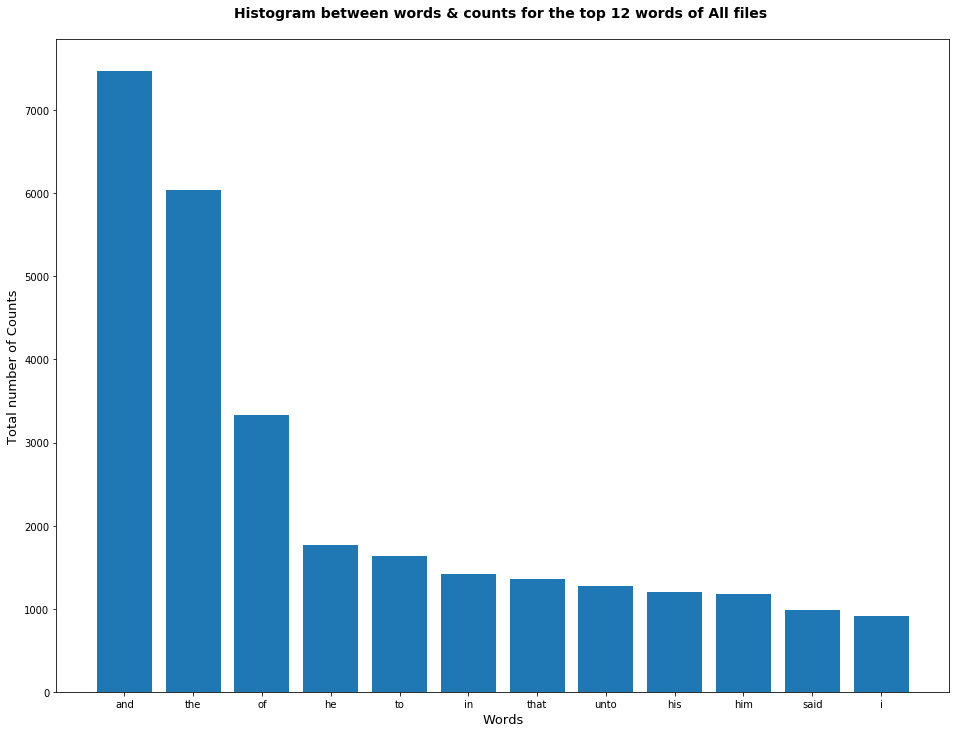

In [56]:
#Inserting the Files for which we want to check the top 'n' words.
file_names = ["Genesis.txt", 
            "Luke.txt",
            "Kings.txt"]


#Counting the top 12 words of all files. 
file_words = map_reduce(file_names,
                        words_all_files_mapper, 
                        most_pop_top_n_word_reducer, n=12)







#Inserting code to show the output in a format that looks good with the table.
for xy in file_words:
    print("\n Top " + str(len(file_words[0][1])) + " words in all the files are : ")
    print(tabulate(xy[1], headers = ["Words", "Counts"], tablefmt="fancy_grid")) 
    

#--------------------------------------------***-----------------------------------------------------------#


    #Inserting code to analyse the data with the help of bar plot for the top 'n' words b/w words & counts.   
    Table = xy[1]
    Label1=[]
    Count1=[]
    
    #To incraese the size of plot:-
    plt.figure(figsize=(16, 12)) 
    
    #Loop to get x & y i.e. Label(words) and its count.
    for i in range(0,len(Table)):
        Label1.append(Table[i][0])
        Count1.append(Table[i][1])

    y_pos = np.arange(len(Label1))
    
    
    #Inserting code to show the bar plot.
    plt.bar(y_pos, Count1)
    plt.xticks(y_pos, Label1)
    
    #Inserting code to label the x-axis & y-axis of bar plot.
    plt.xlabel('Words', fontsize=13)
    plt.ylabel('Total number of Counts', fontsize=13) 
    
    #Inserting code to write the title of bar plot.
    plt.title("Histogram between words & counts for the top " + str(len(xy[1])) + " words of All files \n", 
              fontsize=14, fontweight='bold')

    plt.show()

# Q1 To get the top 'n' words of each file individually. (Type-2)

In [57]:

# Inserting a code to create a mapper function that return (file, value) for each file update
def words_per_file_mapper(file_name):
    
    #Inserting a code to read all the files & then tokenize it.
    with open (file_name, "r") as f:
        for line in f:
            for word in tokenize(line):
                yield(file_name,(word,1))


                
                
# Q2 is done by 2 ways (In 1st type, we find the top 'n' words from the list of all files as asked.)
                     # (In 2nd type, we are finding top 'n' words of each file individually. )                             

    
# Here, in 2nd type we just changed the mapper.    

In [58]:
#Inserting the Files for which we want to check the top 'n' words.
file_names = ["Genesis.txt", 
            "Luke.txt",
            "Kings.txt"]


#Counting the top *8* words per file. 
file_words = map_reduce(file_names,
                        words_per_file_mapper, 
                        most_pop_top_n_word_reducer, n=8)

#Inserting code to show the output in a format that looks good with the table.
for x in file_words:    
    print("\n Top " + str(len(x[1])) + " words in the file '" + x[0] + "' are :")  
    print(tabulate(x[1], headers = ["Words", "Counts"], tablefmt="fancy_grid"))  


 Top 8 words in the file 'Genesis.txt' are :
╒═════════╤══════════╕
│ Words   │   Counts │
╞═════════╪══════════╡
│ and     │     3678 │
├─────────┼──────────┤
│ the     │     2459 │
├─────────┼──────────┤
│ of      │     1366 │
├─────────┼──────────┤
│ his     │      653 │
├─────────┼──────────┤
│ he      │      652 │
├─────────┼──────────┤
│ to      │      612 │
├─────────┼──────────┤
│ in      │      600 │
├─────────┼──────────┤
│ unto    │      598 │
╘═════════╧══════════╛

 Top 8 words in the file 'Luke.txt' are :
╒═════════╤══════════╕
│ Words   │   Counts │
╞═════════╪══════════╡
│ and     │     1910 │
├─────────┼──────────┤
│ the     │     1429 │
├─────────┼──────────┤
│ of      │      786 │
├─────────┼──────────┤
│ he      │      662 │
├─────────┼──────────┤
│ to      │      545 │
├─────────┼──────────┤
│ him     │      503 │
├─────────┼──────────┤
│ that    │      473 │
├─────────┼──────────┤
│ unto    │      400 │
╘═════════╧══════════╛

 Top 8 words in the file 'Kings.txt'

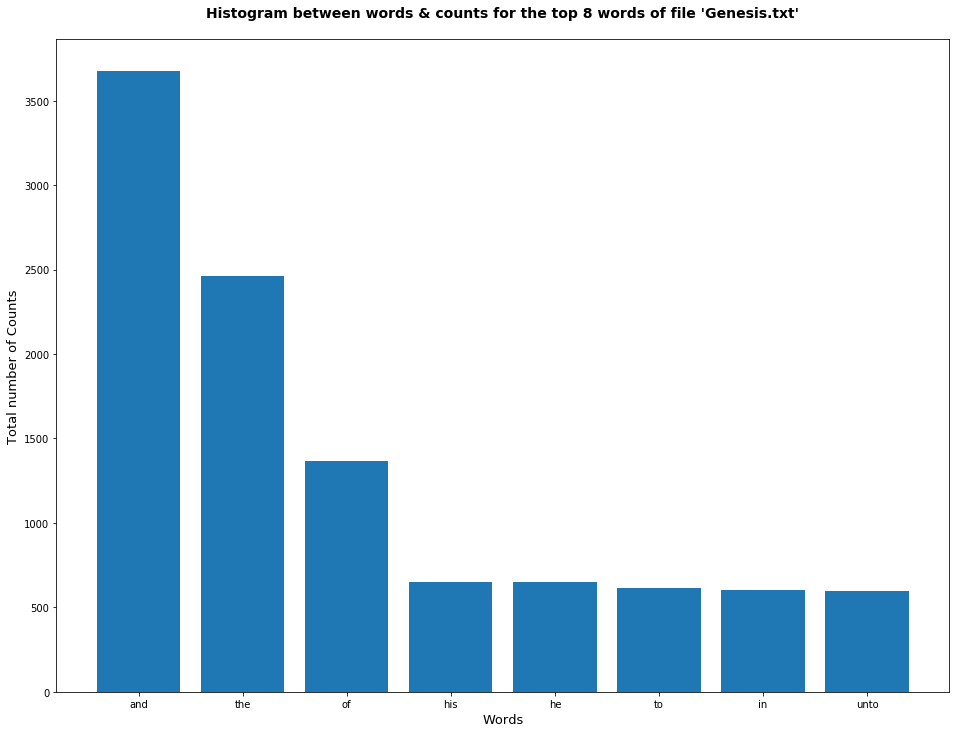

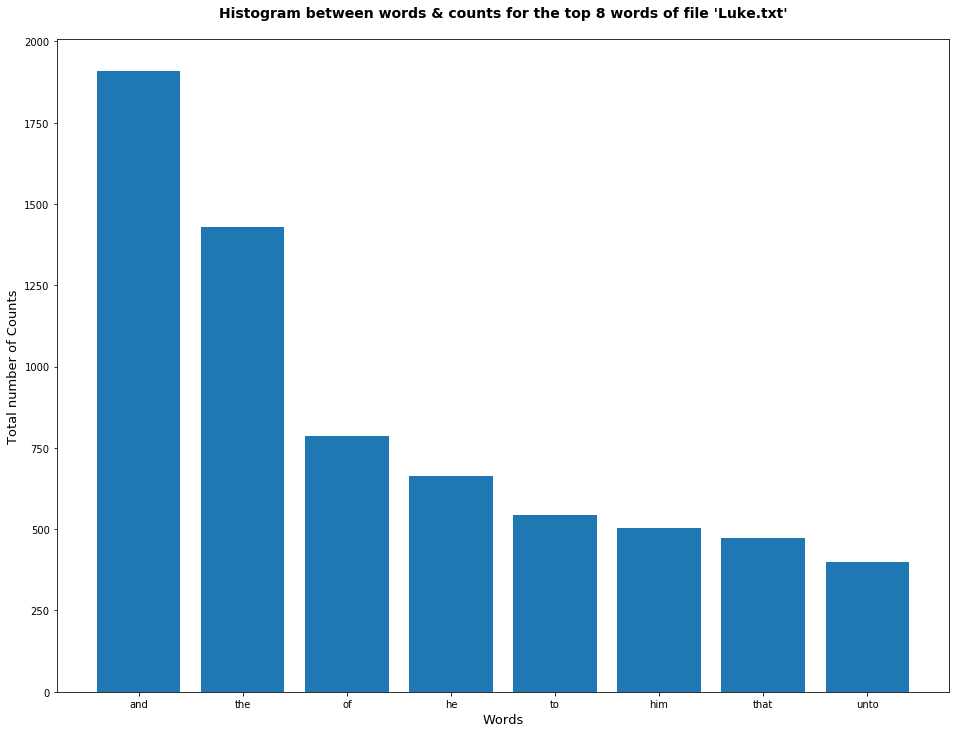

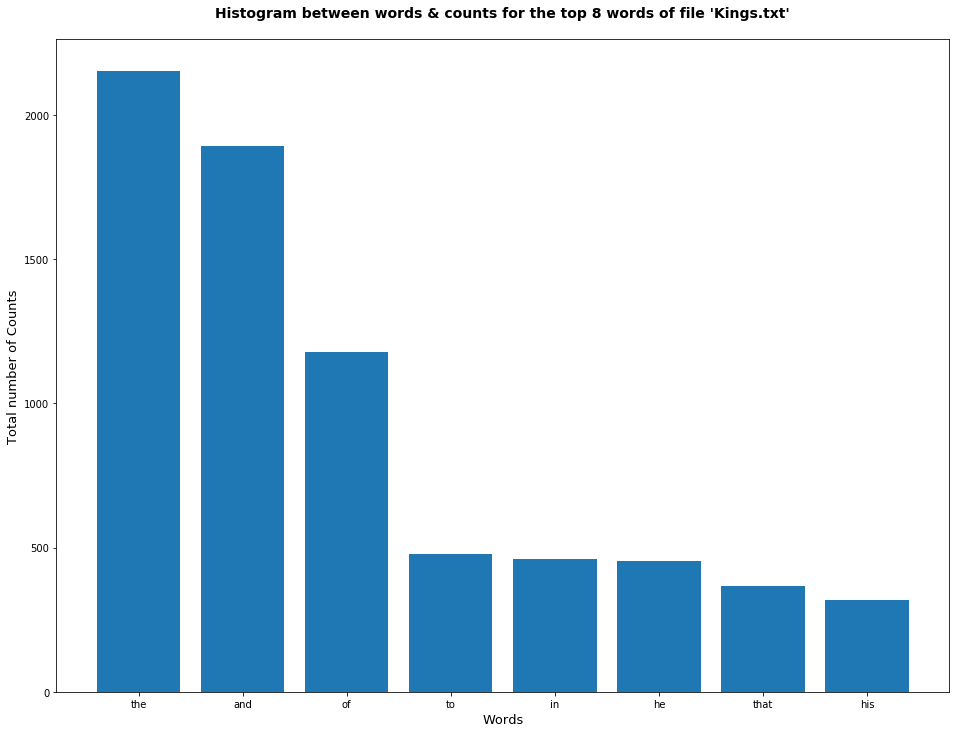

In [59]:
#Inserting code to analyse the data with the help of bar plot for the top 'n' words b/w words & counts.   
for x in file_words:
    Table = x[1]
    Label=[]
    Count=[]
    
    #To incraese the size of plot:-
    plt.figure(figsize=(16, 12)) 
    
    #Loop to get x & y i.e. Label(words) and its count.
    for i in range(0,len(Table)):
        Label.append(Table[i][0])
        Count.append(Table[i][1])

    y_pos = np.arange(len(Label))
    
    
    #Inserting code to show the bar plot.
    plt.bar(y_pos, Count)
    plt.xticks(y_pos, Label)
    
    #Inserting code to label the x-axis & y-axis of bar plot.
    plt.xlabel('Words', fontsize=13)
    plt.ylabel('Total number of Counts', fontsize=13) 
    
    #Inserting code to write the title of bar plot.
    plt.title("Histogram between words & counts for the top " + str(len(x[1])) + " words of file '" + x[0] + "'\n", 
              fontsize=14, fontweight='bold')

    plt.show()

# Q2:- Here, we find top 'n' words from the list of files starting with the given letter(for e.g. here we are using letter 'N')   (Type-1)

In [60]:
#Importing all the filenames listed in the directory.
import os             
all_files = os.listdir('C:\\Users\\pjoshi3\\mapreduce\\Untitled Folder')   # imagine you're one directory above test dir
print(all_files)

['.ipynb_checkpoints', 'egrep.py', 'Genesis.txt', 'Kings.txt', 'line_count.py', 'Luke.txt', 'mapreduceQ4.ipynb', 'map_reduce_Q1&Q2.ipynb', 'most_common_words.py', 'Q3method1_mapreduce.ipynb', 'Q3method2_mapreduce.ipynb', 'Q3method3_mapreduce.ipynb', 'yob1880.txt', 'yob1881.txt', 'yob1882.txt', 'yob1883.txt', 'yob1884.txt', 'yob1885.txt', 'yob1886.txt', 'yob1887.txt', 'yob1888.txt', 'yob1889.txt', 'yob1890.txt', 'yob1891.txt', 'yob1892.txt', 'yob1893.txt', 'yob1894.txt', 'yob1895.txt', 'yob1896.txt', 'yob1897.txt', 'yob1898.txt', 'yob1899.txt', 'yob1900.txt', 'yob1901.txt', 'yob1902.txt', 'yob1903.txt', 'yob1904.txt', 'yob1905.txt', 'yob1906.txt', 'yob1907.txt', 'yob1908.txt', 'yob1909.txt', 'yob1910.txt', 'yob1911.txt', 'yob1912.txt', 'yob1913.txt', 'yob1914.txt', 'yob1915.txt', 'yob1916.txt', 'yob1917.txt', 'yob1918.txt', 'yob1919.txt', 'yob1920.txt', 'yob1921.txt', 'yob1922.txt', 'yob1923.txt', 'yob1924.txt', 'yob1925.txt', 'yob1926.txt', 'yob1927.txt', 'yob1928.txt', 'yob1929.txt', 

In [69]:
# Here, we are inserting code to create a map_reduce function that runs MapReduce on input using functions mapper and reducer
def map_reduce1(inputs, mapper, reducer,n,a1a):
    """runs MapReduce on input using functions mapper and reducer"""
    collector = defaultdict(list)
    
    # write a for loop over the inputs that calls mapper
    for i in inputs:
        for key, value in mapper(i):
            collector[key].append(value)
    #print(collector)   
    # write a return statement that calls the reducer
    return [output
           for key, values in collector.items()
           for output in reducer(key,values,n,a1a)]  

# Inserting code to create a dictionary for the files available in directories from 'yob1880.txt' to 'yob2016.txt'
file_names=[]
for i in range(12,len(all_files)):
    file_names.append({"file_name" : "All_Files_1880to2016", 
                         "text"    :  all_files[i]})
    
# Inserting a code to create a mapper function that return (file, value) for each file update
def words_All_files_mapper1(file_name):
    """return (file, value) for each file update"""
    file = file_name["file_name"]
    with open (file_name["text"], "r") as f:
        for line in f:
            name,sex,num=line.split(",")
            for name in tokenize(line):
                yield(file,(name, int(num)))

# Inserting a code to create a reducer function that return the word with the total count    
def most_pop_top_n_word_reducer1(file, words_and_counts, n,a1a):
    """given a sequence of (word, count) pairs, 
    return the word with the highest total count"""
    word_counts = Counter()
    W_and_C=[]
    for i in range(0,len(words_and_counts)):
        if words_and_counts[i][0][0]==a1a:
            W_and_C.append(words_and_counts[i]) 
    for word, count in W_and_C:
        word_counts[word] += count
    
    # find most common word and return that (key, value) pair
    yield (file, word_counts.most_common(n))



In [62]:
# Now, we are going to find top 5 values from the list of files(Year 1880 to 2016) starting with the letter "n"


 Top 5 words from the list of files starting with 1880 to 2016 are :
╒══════════╤══════════╕
│ Words    │   Counts │
╞══════════╪══════════╡
│ nancy    │  1004617 │
├──────────┼──────────┤
│ nicholas │   893128 │
├──────────┼──────────┤
│ nicole   │   586029 │
├──────────┼──────────┤
│ nathan   │   536819 │
├──────────┼──────────┤
│ noah     │   358475 │
╘══════════╧══════════╛


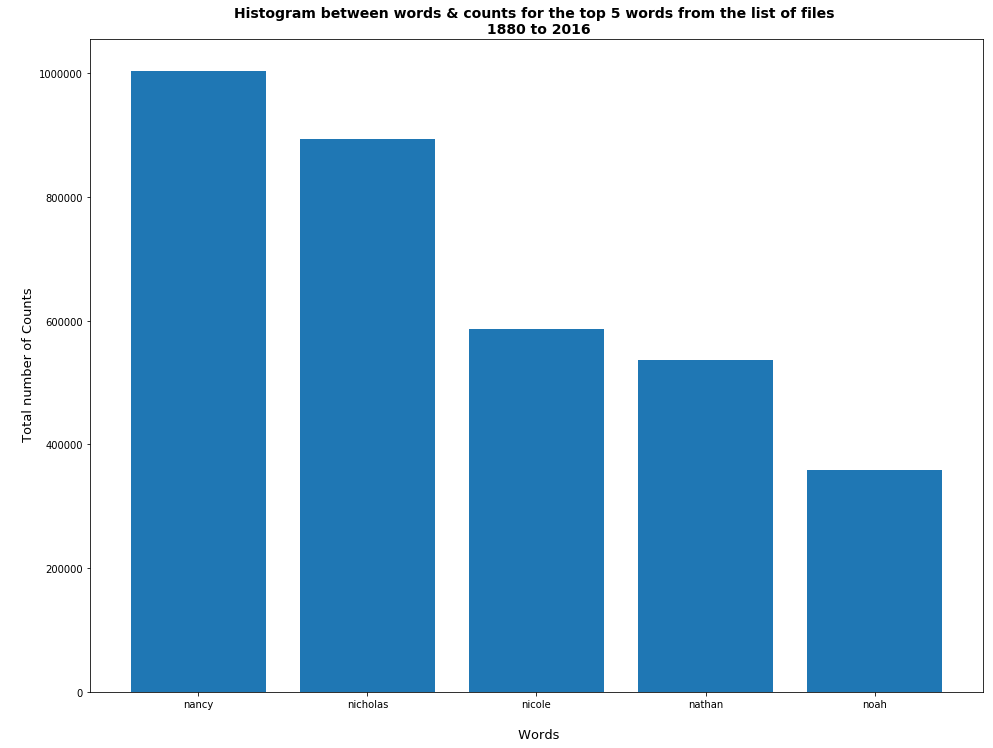

In [63]:
All_Files_words_1880_to_2016 = map_reduce1(file_names,
                        words_All_files_mapper1, 
                        most_pop_top_n_word_reducer1, 5, 'n')


#Inserting code to show the output in a format that looks good with the table.
for x in All_Files_words_1880_to_2016:    
    print("\n Top " + str(len(x[1])) + " words from the list of files starting with 1880 to 2016" + " are :")  
    print(tabulate(x[1], headers = ["Words", "Counts"], tablefmt="fancy_grid")) 
    
    
#--------------------------------------------***-----------------------------------------------------------#    
    
    #Inserting code to analyse the data with the help of bar plot for the top 'n' words b/w words & counts.   
    Table = x[1]
    Label1=[]
    Count1=[]
    
    #To incraese the size of plot:-
    plt.figure(figsize=(16, 12)) 
    
    #Loop to get x & y i.e. Label(words) and its count.
    for i in range(0,len(Table)):
        Label1.append(Table[i][0])
        Count1.append(Table[i][1])

    y_pos = np.arange(len(Label1))
    
    
    #Inserting code to show the bar plot.
    plt.bar(y_pos, Count1)
    plt.xticks(y_pos, Label1)
    
    #Inserting code to label the x-axis & y-axis of bar plot.
    plt.xlabel('\n Words', fontsize=13)
    plt.ylabel('\n Total number of Counts', fontsize=13) 
    
    #Inserting code to write the title of bar plot.
    plt.title("Histogram between words & counts for the top "+ str(len(x[1]))+ " words from the list of files \n 1880 to 2016", 
              fontsize=14, fontweight='bold')

    plt.show()


# Q2:- Here, we find top 'n' words for each files individually(as mentioned) starting with any letter(for e.g. here we are using letter 'w')   (Type-2)

In [64]:
def words_per_file_mapper2(file_name):
    """return (file, value) for each file update"""
    with open (file_name, "r") as f:
        for line in f:
            name,sex,num=line.split(",")
            for name in tokenize(line):
                yield(file_name,(name, int(num)))



In [65]:
# Now, we are going to find top 4 values from each file individually(Year 1980 to 1982) starting with the letter "W"

# Here, we can give the file names for which we want to find top 'n' words and it will come individually.


 Top 4 words in the file 'yob1980.txt' are :
╒═════════╤══════════╕
│ Words   │   Counts │
╞═════════╪══════════╡
│ william │    25870 │
├─────────┼──────────┤
│ wendy   │     4162 │
├─────────┼──────────┤
│ wesley  │     3207 │
├─────────┼──────────┤
│ willie  │     2231 │
╘═════════╧══════════╛


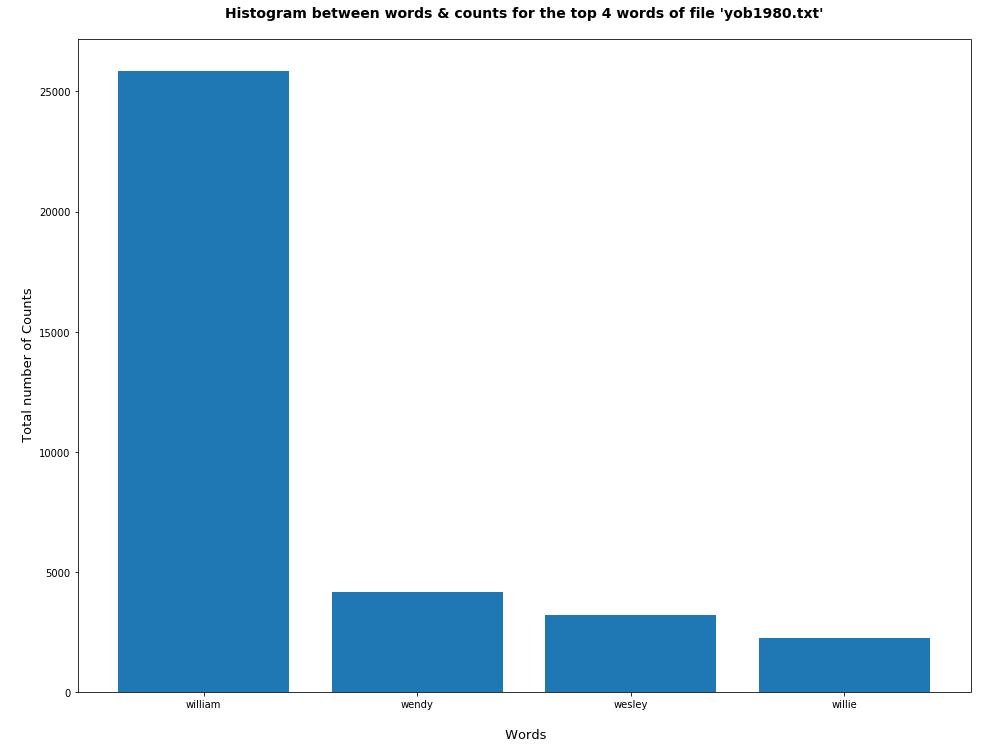


 Top 4 words in the file 'yob1981.txt' are :
╒═════════╤══════════╕
│ Words   │   Counts │
╞═════════╪══════════╡
│ william │    24974 │
├─────────┼──────────┤
│ wendy   │     3634 │
├─────────┼──────────┤
│ wesley  │     3072 │
├─────────┼──────────┤
│ willie  │     2021 │
╘═════════╧══════════╛


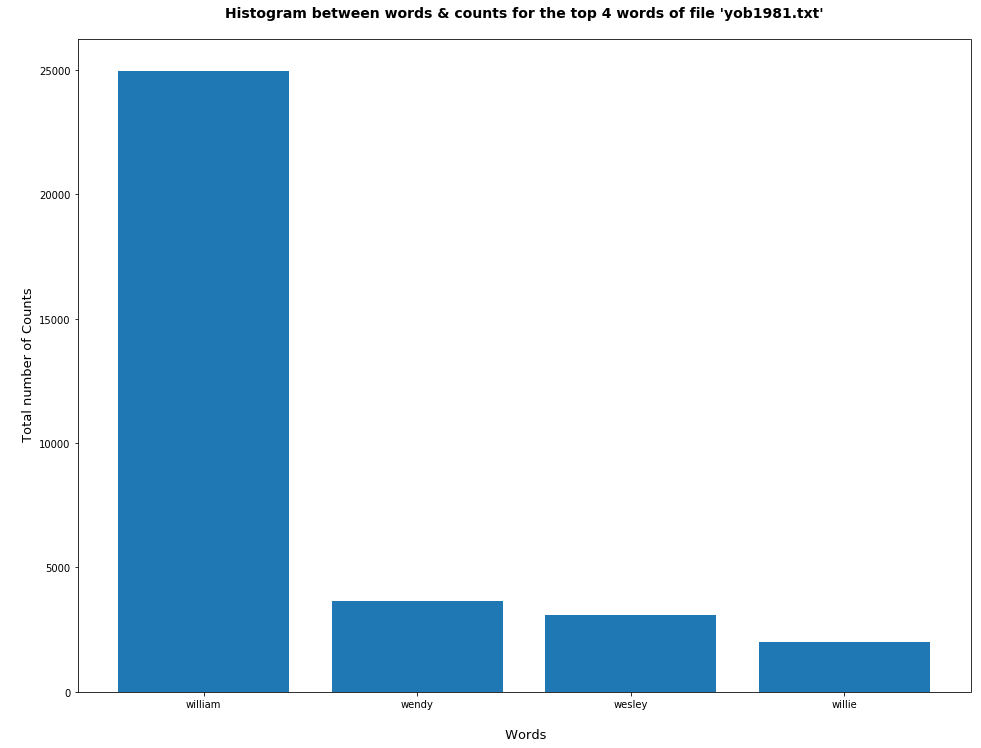


 Top 4 words in the file 'yob1982.txt' are :
╒═════════╤══════════╕
│ Words   │   Counts │
╞═════════╪══════════╡
│ william │    25778 │
├─────────┼──────────┤
│ wesley  │     3079 │
├─────────┼──────────┤
│ wendy   │     2838 │
├─────────┼──────────┤
│ willie  │     2016 │
╘═════════╧══════════╛


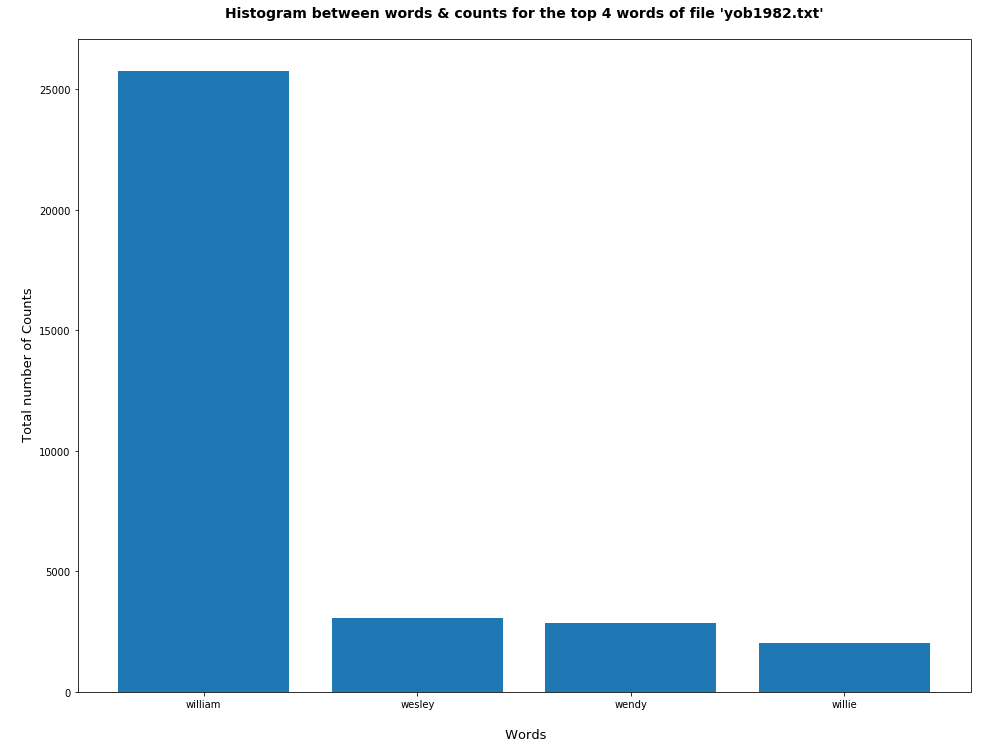

In [66]:
# Giving the files, for which we need top 4 words
file_names = ["yob1980.txt","yob1981.txt","yob1982.txt"]

file_words = map_reduce1(file_names,
                        words_per_file_mapper2, 
                        most_pop_top_n_word_reducer1,4,'w')


#--------------------------------------------***-----------------------------------------------------------#


#Inserting code to show the output in a format that looks good with the table.
for x in file_words:    
    print("\n Top " + str(len(x[1])) + " words in the file '" + x[0] + "' are :")  
    print(tabulate(x[1], headers = ["Words", "Counts"], tablefmt="fancy_grid")) 
    
    Table = x[1]
    Label=[]
    Count=[]
    
    #To incraese the size of plot:-
    plt.figure(figsize=(16, 12)) 
    
    #Loop to get x & y i.e. Label(words) and its count.
    for i in range(0,len(Table)):
        Label.append(Table[i][0])
        Count.append(Table[i][1])

    y_pos = np.arange(len(Label))
    
    
    #Inserting code to show the bar plot.
    plt.bar(y_pos, Count)
    plt.xticks(y_pos, Label)
    
    #Inserting code to label the x-axis & y-axis of bar plot.
    plt.xlabel('\n Words', fontsize=13)
    plt.ylabel('\n Total number of Counts', fontsize=13) 
    
    #Inserting code to write the title of bar plot.
    plt.title("Histogram between words & counts for the top " + str(len(x[1])) + " words of file '" + x[0] + "'\n", 
              fontsize=14, fontweight='bold')

    plt.show()   

# Q3:- Here, we find top 'n' words from the list of files with the letter 'll' anywhere in name string.

In [73]:
# Here, we are inserting code to create a map_reduce function that runs MapReduce on input using functions mapper and reducer   
def words_All_files_mapper3(file_name):
    """return (file, value) for each file update"""
    file = file_name["file_name"]
    with open (file_name["text"], "r") as f:
        for line in f:
            name,sex,num=line.split(",")
            for name in tokenize(line):
                yield(file,(name, int(num)))

                
# Inserting code to create a dictionary for the files available in directories from 'yob1880.txt' to 'yob2016.txt'
file_names=[]
for i in range(12,len(all_files)):
    file_names.append({"file_name" : "All_Files_1880to2016", 
                   "text" : all_files[i]})

# Inserting a code to create a reducer function that return the word with the total count  
def most_pop_top_n_word_reducer3(file, words_and_counts, n,a1a):
    """given a sequence of (word, count) pairs, 
    return the word with the highest total count"""
    word_counts = Counter()
    W_and_C=[]
    for i in range(0,len(words_and_counts)):
        if a1a in words_and_counts[i][0]:
            W_and_C.append(words_and_counts[i]) 
    for word, count in W_and_C:
        word_counts[word] += count
    
    # find most common word and return that (key, value) pair
    yield (file, word_counts.most_common(n))
    

In [75]:
# Here, We are finding top 5 values with the letter 'll' in the names anywhere from the list of files(1880 to 2016).


 Top 5 words from the list of files 1880 to 2016 are :
╒══════════╤══════════╕
│ Words    │   Counts │
╞══════════╪══════════╡
│ william  │  4103456 │
├──────────┼──────────┤
│ michelle │   811062 │
├──────────┼──────────┤
│ willie   │   594538 │
├──────────┼──────────┤
│ kelly    │   551962 │
├──────────┼──────────┤
│ lillian  │   434422 │
╘══════════╧══════════╛


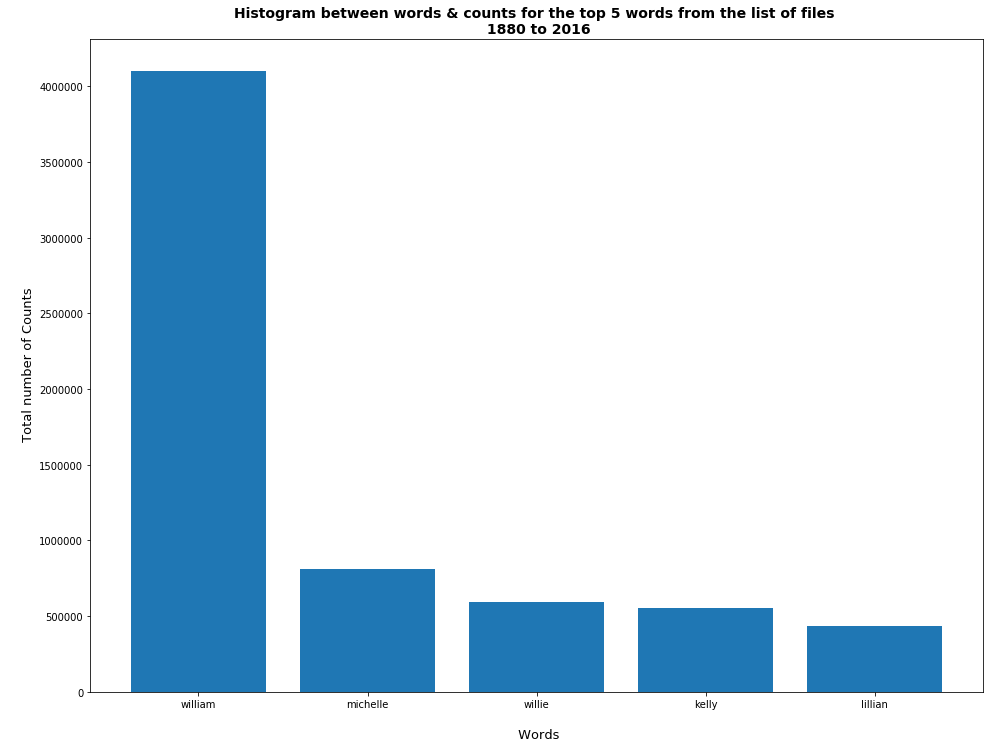

In [74]:
All_Files_words_1880_to_2016 = map_reduce1(file_names,
                        words_All_files_mapper3, 
                        most_pop_top_n_word_reducer3, 5, 'll')


#Inserting code to show the output in a format that looks good with the table.
for x in All_Files_words_1880_to_2016:    
    print("\n Top " + str(len(x[1])) + " words from the list of files 1880 to 2016 are :")  
    print(tabulate(x[1], headers = ["Words", "Counts"], tablefmt="fancy_grid")) 
    
    Table = x[1]
    Label=[]
    Count=[]
    
    #To incraese the size of plot:-
    plt.figure(figsize=(16, 12)) 
    
    #Loop to get x & y i.e. Label(words) and its count.
    for i in range(0,len(Table)):
        Label.append(Table[i][0])
        Count.append(Table[i][1])

    y_pos = np.arange(len(Label))
    
    
    #Inserting code to show the bar plot.
    plt.bar(y_pos, Count)
    plt.xticks(y_pos, Label)
    
    #Inserting code to label the x-axis & y-axis of bar plot.
    plt.xlabel('\n Words', fontsize=13)
    plt.ylabel('\n Total number of Counts', fontsize=13) 
    
    #Inserting code to write the title of bar plot.
    plt.title("Histogram between words & counts for the top "+ str(len(x[1]))+ " words from the list of files \n 1880 to 2016", 
              fontsize=14, fontweight='bold')

    plt.show()   

In [80]:
# Here, We are finding top 15 values with the letter 'ppp' in the names anywhere from the list of files(1880 to 2016).


 Top 15 words from the list of files 1880 to 2016 are :
╒════════════╤══════════╕
│ Words      │   Counts │
╞════════════╪══════════╡
│ giuseppe   │     5346 │
├────────────┼──────────┤
│ tripp      │     3869 │
├────────────┼──────────┤
│ sapphire   │     2945 │
├────────────┼──────────┤
│ philippe   │     2871 │
├────────────┼──────────┤
│ poppy      │     2452 │
├────────────┼──────────┤
│ pepper     │     2309 │
├────────────┼──────────┤
│ kipp       │     2133 │
├────────────┼──────────┤
│ zipporah   │     1973 │
├────────────┼──────────┤
│ philippa   │     1228 │
├────────────┼──────────┤
│ philipp    │      886 │
├────────────┼──────────┤
│ skipper    │      824 │
├────────────┼──────────┤
│ pippa      │      818 │
├────────────┼──────────┤
│ trapper    │      801 │
├────────────┼──────────┤
│ giuseppina │      726 │
├────────────┼──────────┤
│ filippo    │      567 │
╘════════════╧══════════╛


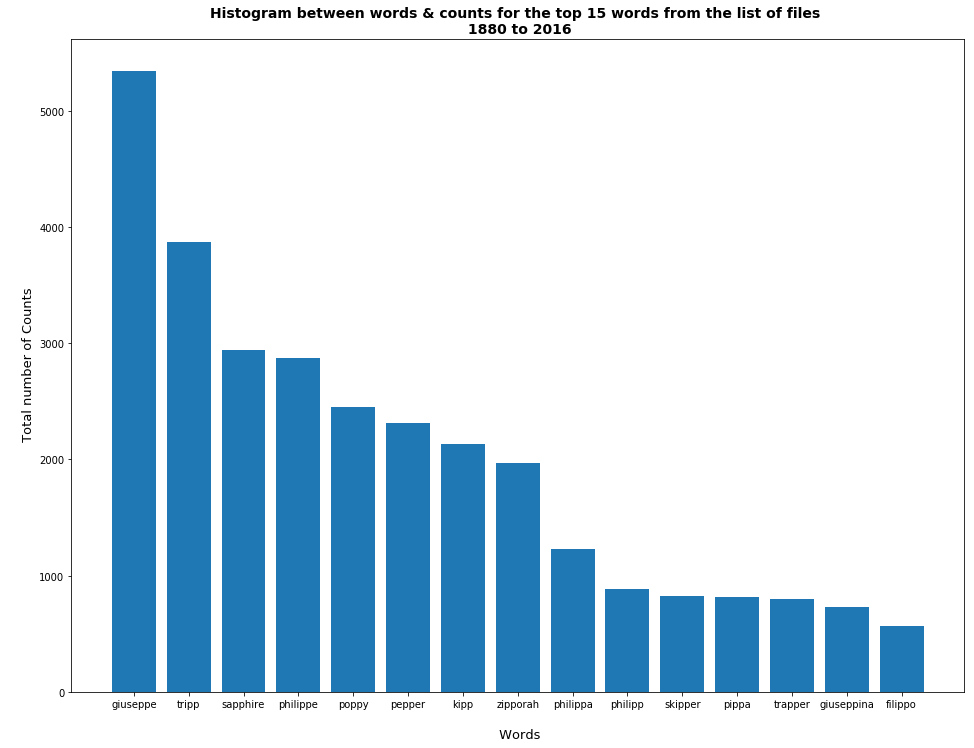

In [79]:
All_Files_words_1880_to_2016 = map_reduce1(file_names,
                        words_All_files_mapper3, 
                        most_pop_top_n_word_reducer3,15,'pp')




#Inserting code to show the output in a format that looks good with the table.
for x in All_Files_words_1880_to_2016:    
    print("\n Top " + str(len(x[1])) + " words from the list of files 1880 to 2016 are :")  
    print(tabulate(x[1], headers = ["Words", "Counts"], tablefmt="fancy_grid")) 
    
    Table = x[1]
    Label=[]
    Count=[]
    
    #To incraese the size of plot:-
    plt.figure(figsize=(16, 12)) 
    
    #Loop to get x & y i.e. Label(words) and its count.
    for i in range(0,len(Table)):
        Label.append(Table[i][0])
        Count.append(Table[i][1])

    y_pos = np.arange(len(Label))
    
    
    #Inserting code to show the bar plot.
    plt.bar(y_pos, Count)
    plt.xticks(y_pos, Label)
    
    #Inserting code to label the x-axis & y-axis of bar plot.
    plt.xlabel('\n Words', fontsize=13)
    plt.ylabel('\n Total number of Counts', fontsize=13) 
    
    #Inserting code to write the title of bar plot.
    plt.title("Histogram between words & counts for the top "+ str(len(x[1]))+ " words from the list of files \n 1880 to 2016", 
              fontsize=14, fontweight='bold')

    plt.show()   